###### *Author : Mohlatlego Nakeng, MIT Big data sciences*

Description : Based on texts from tweeter, we can decide if text was mis/dis informed. In this task we interate through text to decide if a text was a mis,dis information.

###### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Let us import the dataset

In [4]:
data =pd.read_csv("data/raw/vaccine_jhb.csv", sep="\t")

In [5]:
data1 = pd.read_csv("covid_jhb.csv",sep="\t")

In [6]:
df = data[["username", "name", "tweet"]]

In [7]:
df1 = data1[["username", "name", "tweet"]]

In [8]:
df.head(10)

,username,name,tweet
0,comrade0072,I thank you,@LadyhawkAnnie The fact that nobody has attemp...
1,comrade0072,I thank you,@Newzroom405 Maybe he needs Pfizer for the spear.
2,nuru_yochanan,Yochanan,"@__Inolofatse__ Fostofol I'm not your fan, sec..."
3,azania109,Azania,@SundayTimesZA Asina ndaba we trust our own na...
4,muslimassocsa,Muslim Association of South Africa,As August comes to an end we look back at 27 d...
5,sep_3009,TRK,@Discovery_SA is it possible to obtain a vacci...
6,muslimassocsa,Muslim Association of South Africa,Our Day in Numbers: #VacciNation UPDATE: 31st ...
7,polo_zn,TaMike,@Tau_Sebatha @ThantshaKhathi @KaConfessor In t...
8,dumisantakana24,ngubengcuka ☭,the chaps under that mountain beat us to an on...
9,ndizizi,Vaxxed Queen of Owls Forged in the Fire of Chaos,Has anyone else had really sensitive skin as a...


In [9]:
df

,username,name,tweet
0,comrade0072,I thank you,@LadyhawkAnnie The fact that nobody has attemp...
1,comrade0072,I thank you,@Newzroom405 Maybe he needs Pfizer for the spear.
2,nuru_yochanan,Yochanan,"@__Inolofatse__ Fostofol I'm not your fan, sec..."
3,azania109,Azania,@SundayTimesZA Asina ndaba we trust our own na...
4,muslimassocsa,Muslim Association of South Africa,As August comes to an end we look back at 27 d...
...,...,...,...
9722,lita_0525mgp,M135i Is Achievable🇿🇦,@TedPhaladi I agree just go with the flow beca...
9723,salvo1279,🏳️‍🌈Stephen is Tuesday's child🇿🇦,"And for the love of God, fuck #SAA, use this m..."
9724,salvo1279,🏳️‍🌈Stephen is Tuesday's child🇿🇦,And A VACCINE STRATEGY SHOULD BE ANNOUNCED AND...
9725,pastorransley,Godfrey Mhlari 🇿🇦,Where it all start the chines are on with thei...


In [10]:
df = df.append(df1, ignore_index=True)

We use key words that normally people use to make incorrect covid-19/vaccine comments. We mark them suspicious in the categorisation column

In [11]:
import re
import nltk
from nltk.corpus import stopwords

In [12]:
A = df.tweet.str.contains('masks')
vaccine_tweets=df[A]
vaccine_tweets.tweet.count()

250

In [13]:
vaccine_tweets

,username,name,tweet
75,azania109,Azania,"@mzwaimbeje Proof ? Am not vaccinated,alot of ..."
282,azania109,Azania,@UncensoredView1 You are promoting something w...
877,kgosi187,Kgosi,I'm tired of checking out girls with their mas...
1394,garnet33669677,GTN,Will vaccinate the day people who have been va...
1432,azania109,Azania,@News24 @GroundUp_News Where are these people ...
...,...,...,...
32133,hlogieseema,Leeya,Has anyone thought that Corona is the apocalyp...
32208,yesreallyangel,Angel Campey 💉,At the international departures terminal in Jo...
32413,covid_19_za,Department of Health: COVID-19,@MissRamoroko Hi @MissRamoroko . If you choose...
32416,uk_republic,The spirit of Diderot,"@SteveKrono Indeed, and all the custom officer..."


In [14]:
vaccine_tweets["tweet"].iloc[1]

"@UncensoredView1 You are promoting something which you yourself don't know the constituents of,and the way you pushing this agenda of yours 1 will even start to suspect that you are being paid to do it...people have been and are still surviving without wearing masks, taking vaccines etc"

In [15]:
suspicious_tweets= []
for index, row in df.iterrows():
    code = row['tweet']
    if 'vaccinated only' in code:
        tweet = "suspicious"
    elif "666" in code:
        tweet = "suspicious"
    elif "kill" in code:
        tweet = "suspicious"
    elif "masks" in code:
        tweet = "suspicious"
    else:
        tweet = "accurate"
    suspicious_tweets.append(tweet)
    

df["category"] = suspicious_tweets

In [16]:
df.loc[df["category"]=="suspicious"].count()

username    783
name        783
tweet       783
category    783
dtype: int64

In [17]:
df.to_csv("suspicious.csv")

In [18]:
df

,username,name,tweet,category
0,comrade0072,I thank you,@LadyhawkAnnie The fact that nobody has attemp...,accurate
1,comrade0072,I thank you,@Newzroom405 Maybe he needs Pfizer for the spear.,accurate
2,nuru_yochanan,Yochanan,"@__Inolofatse__ Fostofol I'm not your fan, sec...",accurate
3,azania109,Azania,@SundayTimesZA Asina ndaba we trust our own na...,accurate
4,muslimassocsa,Muslim Association of South Africa,As August comes to an end we look back at 27 d...,accurate
...,...,...,...,...
32608,ndim_uchris,uTata ka Zama and others,Corona emo specialeng,accurate
32609,collen_el,Collen Jay El'Padroni,@SbusisoMthimkul @mizar_CDXX Kodwa Bafo wena i...,accurate
32610,em_jay7,High Sauce,Hahahaha re nwa Corona,accurate
32611,fana__n,FANA,@lebohang_dh Inside joke yeah but I open beer ...,accurate


In [20]:
df['category'].value_counts()

accurate      31830
suspicious      783
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

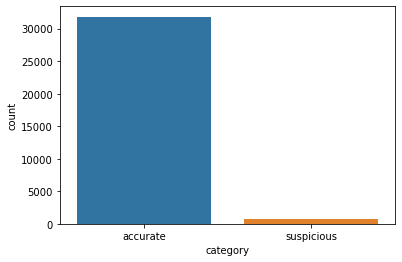

In [19]:
sns.countplot(df['category'])